In [1]:
# Import dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

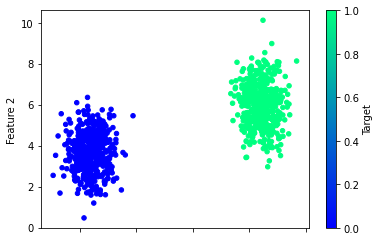

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

#Creating a dataframe with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
#Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential Model
nn_model = tf.keras.models.Sequential()

2022-02-22 15:37:09.807598: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Add our first dense layer, inlcuding our input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 1.1231 - accuracy: 0.0253
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0844 - accuracy: 0.0040
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 1.0488 - accuracy: 0.0040
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0162 - accuracy: 0.0040
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.9865 - accuracy: 0.0040
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9597 - accuracy: 0.0053
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9346 - accuracy: 0.0053
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.9121 - accuracy: 0.0053
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.8910 - accuracy: 0.0107
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.8721 - accuracy: 0.0160
Epoch 11/

24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 84/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 85/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 86/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 87/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 88/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 89/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 90/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 91/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 92/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 93/100


<AxesSubplot:>

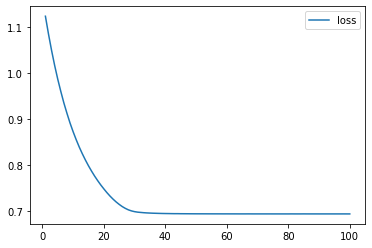

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")